<a href="https://colab.research.google.com/github/lumasg/Data_Insider/blob/main/Data_Insider.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Configurtacion del Ambiente

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import requests
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

#2. Obtencion de Datos

Obtener bases de Forbes Global 2000

In [4]:
df_2015 = pd.read_excel("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Forbes Global 2000/Forbes Global 2000 - 2015 — unified industry.xlsx")
df_2016 = pd.read_excel("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Forbes Global 2000/Forbes Global 2000 - 2016 — unified industry.xlsx")
df_2017 = pd.read_excel("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Forbes Global 2000/Forbes Global 2000 - 2017 — unified industry.xlsx")
df_2018 = pd.read_excel("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Forbes Global 2000/Forbes Global 2000 - 2018 — unified industry.xlsx")
df_2019 = pd.read_excel("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Forbes Global 2000/Forbes Global 2000 - 2019 — unified industry.xlsx")
df_2020 = pd.read_excel("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Forbes Global 2000/Forbes Global 2000 - 2020 — unified industry.xlsx")
df_2021 = pd.read_excel("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Forbes Global 2000/Forbes Global 2000 - 2021 — unified industry.xlsx")
df_2022 = pd.read_excel("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Forbes Global 2000/Forbes Global 2000 - 2022 — unified industry.xlsx")

In [5]:
#Se detecto en la Web que los ingresos de Porsche Automobil Holding en el año 2017 fueron de 25 Millone de Dolares y no 1 millon
df_2017.loc[df_2017['Sales'] == 1.0, 'Sales'] = 25.0

Agregar columna Año a todas las DataFrames "Forbes Global"

In [7]:
nombres_dataframes = ['df_2015', 'df_2016', 'df_2017', 'df_2018', 'df_2019', 'df_2020', 'df_2020', 'df_2021', 'df_2022']

for nombre in nombres_dataframes:
    # Obtener el DataFrame por su nombre utilizando la función globals()
    df = globals()[nombre]
    # Extraer el año del nombre del DataFrame y convertirlo a entero
    df['Año'] = int(nombre.split('_')[1])

Concatenar todas las DataFrames

In [8]:
dataframes = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

# Concatenar los DataFrames
forbes_2022 = pd.concat(dataframes, ignore_index=True)

Cambiar los nombres de las columnas y agregar Margen de Rentabilidad y Rentabilidad de los Activos

In [9]:
forbes_2022 = forbes_2022[["Company",'Industry', 'Country', 'Sales', 'Profits', "Assets", "Market_Value", "Año"]]
forbes_2022.columns = ["Empresa", "Industria", "Pais", "Ingresos", "Ganancias", "Activos" , "Valor de Mercado", "Año"]
forbes_2022["Margen_de_Rentabilidad"] = forbes_2022["Ganancias"] / forbes_2022["Ingresos"]
forbes_2022["Rentabilidad de los Activos (ROA)"] = forbes_2022["Ganancias"] / forbes_2022["Activos"]

In [ ]:
mrpr = forbes_2022[forbes_2022["Margen_de_Rentabilidad"] >= 1].sort_values("Margen_de_Rentabilidad", ascending = False)

In [ ]:
mrpr.to_excel("mror.xlsx", index=False)

Obtener bases de Fortune Global 500

In [10]:
dft_2015 = (pd.read_html("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Fortune Global/fortune_global_2015.html"))[0]
dft_2016 = (pd.read_html("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Fortune Global/fortune_global_2016.html"))[0]
dft_2017 = (pd.read_html("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Fortune Global/fortune_global_2017.html"))[0]
dft_2018 = (pd.read_html("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Fortune Global/fortune_global_2018.html"))[0]
dft_2019 = (pd.read_html("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Fortune Global/fortune_global_2019.html"))[0]
dft_2020 = (pd.read_html("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Fortune Global/fortune_global_2020.html"))[0]
dft_2021 = (pd.read_html("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Fortune Global/fortune_global_2021.html"))[0]
dft_2022 = (pd.read_html("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/Fortune Global/fortune_global_2022.html"))[0]

In [11]:
nombres_dataframes = ['dft_2015', 'dft_2016', 'dft_2017', 'dft_2018', 'dft_2019', 'dft_2020', 'dft_2020', 'dft_2021', 'dft_2022']

for nombre in nombres_dataframes:
    # Obtener el DataFrame por su nombre utilizando la función globals()
    df = globals()[nombre]
    # Extraer el año del nombre del DataFrame y convertirlo a entero
    df['Año'] = int(nombre.split('_')[1])

In [12]:
dataframes = [dft_2015, dft_2016, dft_2017, dft_2018, dft_2019, dft_2020, dft_2021, dft_2022]

# Concatenar los DataFrames
fortune_2022 = pd.concat(dataframes, ignore_index=True)

In [13]:
fortune_2022 = fortune_2022[["RemoveRank",	"RemoveName",'RemoveEmployees', "Año"]]
fortune_2022.columns = ["Rango","Empresa", "Empleados", "Año"]

In [14]:
fortune_2022.set_index("Rango", inplace = True)

In [ ]:
fortune_2022.isnull().sum()

Empresa      0
Empleados    0
Año          0
dtype: int64

Obtener bases "Continente y codigo"

In [16]:
continente = pd.read_csv("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/continente.csv")
codigo = pd.read_csv("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/country_code.csv")

Cambiar nombres a las columnas

In [17]:
continente = continente[["Continent_Name",	"Three_Letter_Country_Code"]]
continente.columns = ["Continente","Codigo"]

In [18]:
#Eliminar los duplicados
continente[continente.duplicated()]

,Continente,Codigo


In [19]:
codigo.rename(columns={"Country" : "Pais", "Code" : "Codigo"}, inplace = True)

In [20]:
codigo_final = pd.merge(codigo, continente, on='Codigo')

In [21]:
codigo_final.head(5)

,Pais,Codigo,Continente
0,Afghanistan,AFG,Asia
1,Albania,ALB,Europe
2,Algeria,DZA,Africa
3,American Samoa,ASM,Oceania
4,Andorra,AND,Europe


Obtener los datos históricos de las acciones de 5 empresas de una misma industria (Ejemplos de Industrias: Automotriz, Tecnología, Bancos, entre otras):  entre el 1 de enero  y el 31 de diciembre de 2022 y los vas a almacenar en 5 datasets diferentes. (Las variables que necesitas almacenar en el dataset son: El Símbolo, la Fecha, y los Precios de Apertura, Cierre, Máximo y Mínimo de las acciones)

In [22]:
# Configurar tu clave de API de polygon.io
API_KEY = 'z4wFWJswphIBEIgVhN367NAvNJoV4rh9'

# Definir los símbolos de las empresas que deseas obtener los datos históricos

simbols = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'META']

# Empresas:

# 1. APPLE (AAPL)
# 2. GOOGLE (GOOGL)
# 3. MICROSOFT (MSFT)
# 4. AMAZON (AMZN)
# 5. FACEBOOK (META)

# Definir las fechas de inicio y fin del período histórico deseado
fecha_inicio = '2022-01-01'
fecha_fin = '2022-12-31'

# Realizar la solicitud GET para el símbolo de acción y obtener los datos históricos
for simbolo in simbols:
    url = f"https://api.polygon.io/v2/aggs/ticker/{simbolo}/range/1/day/{fecha_inicio}/{fecha_fin}?apiKey={API_KEY}"
    response = requests.get(url)
    data = response.json()

    # Crear un archivo CSV para almacenar los datos de cada empresa
    archivo_csv = f"/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets//{simbolo}.csv"
    with open(archivo_csv, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['simbolo', 'fecha', 'apertura', 'cierre', 'maximo', 'minimo'])

        # Escribir cada registro de datos en el archivo
        for registro in data['results']:
            fecha = registro['t']
            apertura = registro['o']
            cierre = registro['c']
            maximo = registro['h']
            minimo = registro['l']
            writer.writerow([simbolo, fecha, apertura, cierre, maximo, minimo])

In [23]:
APPLE = pd.read_csv("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/AAPL.csv")
AMAZON = pd.read_csv("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/AMZN.csv")
GOOGLE = pd.read_csv("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/GOOGL.csv")
META = pd.read_csv("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/META.csv")
MICROSOFT = pd.read_csv("/content/drive/MyDrive/Data_Sciencie/Data Insider/Datasets/MSFT.csv")

In [24]:
# Convertir la columna 'Fecha' al formato de fecha
APPLE.loc[:,('fecha')] = pd.to_datetime(APPLE['fecha'], unit='ms')
AMAZON.loc[:,('fecha')] = pd.to_datetime(AMAZON['fecha'], unit='ms')
GOOGLE.loc[:,('fecha')] = pd.to_datetime(GOOGLE['fecha'], unit='ms')
META.loc[:,('fecha')] = pd.to_datetime(META['fecha'], unit='ms')
MICROSOFT.loc[:,('fecha')] = pd.to_datetime(MICROSOFT['fecha'], unit='ms')

Agregar a la base de Forbes 2000 el continente y codigo de pais

In [25]:
forbes_2022_2= pd.merge(forbes_2022, codigo_final, on='Pais')

In [26]:
forbes_2022_2.isnull().sum()

Empresa                               0
Industria                             0
Pais                                  0
Ingresos                              8
Ganancias                             2
Activos                              14
Valor de Mercado                      6
Año                                   0
Margen_de_Rentabilidad               10
Rentabilidad de los Activos (ROA)    15
Codigo                                0
Continente                            0
dtype: int64

Agregar a la base de Forbes 2000 los empleados

In [27]:
forbes_2022_3= pd.merge(forbes_2022, fortune_2022, on = ["Año", "Empresa"])

#Cuestionario A
1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?

In [ ]:
#@title
#Obtener la base de Top 10 de países con más empresas en Forbes 2022
f_2022 = forbes_2022_2[forbes_2022_2['Año'] == 2022]
paises = f_2022.value_counts("Pais").head(25).index
top10 = paises[:10]

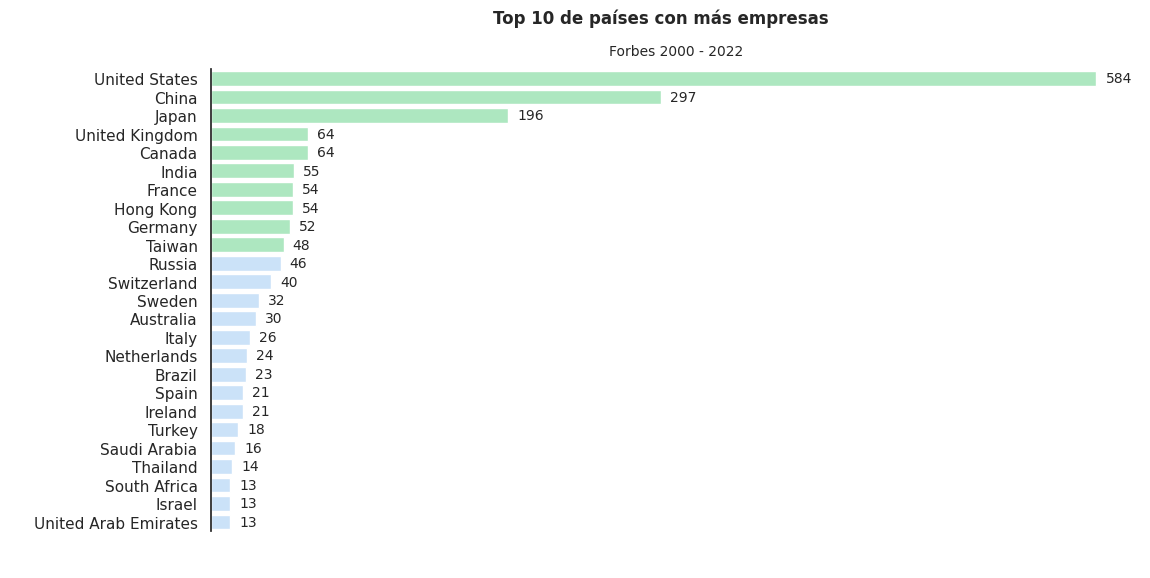

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Destacando el TOP 10 de los paises con mas empresas
colores = ["#A3F1BC" if (pais in top10) else "#C3E2FF" for pais in paises]


#Generar la grafica de barras y eliminar la info del eje X
ax = sns.countplot(data = f_2022, y = "Pais",
                   order = f_2022.value_counts("Pais").head(25).index,
                   palette = colores)
ax.set_xticklabels([])

# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Top 10 de países con más empresas", size = 12, weight = "bold")
plt.title("Forbes 2000 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 6
  cantidad = f'{pos_x:,.0f}'.replace(',','.')
  ax.text(x = pos_x + offset , y = pos_y, s = cantidad, va='center', fontsize=10)

plt.show()

<font color=green size=4> Observaciones e hipótesis: </font>

---

Podemos observar que  el Top 10 de países con más empresas lidereando **USA** teniendo la sumatoria de empresas de china y Japon que se encuentran en el 2 y 3 lugar de la tabla.

2. ¿Cuál es el Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones?

In [ ]:
#@title
#Obtener la base de Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones en Forbes 2022
f_2022 = forbes_2022_2[(forbes_2022_2['Año'] == 2022) &
                       (forbes_2022_2['Industria'].isin(['IT Software & Services',
                                                        'Telecommunications Services',
                                                        'Technology Hardware & Equipment',
                                                        'Semiconductors']))]
paises = f_2022.value_counts("Pais").sort_values(ascending=False).head(20).index
top4 = paises[:4]

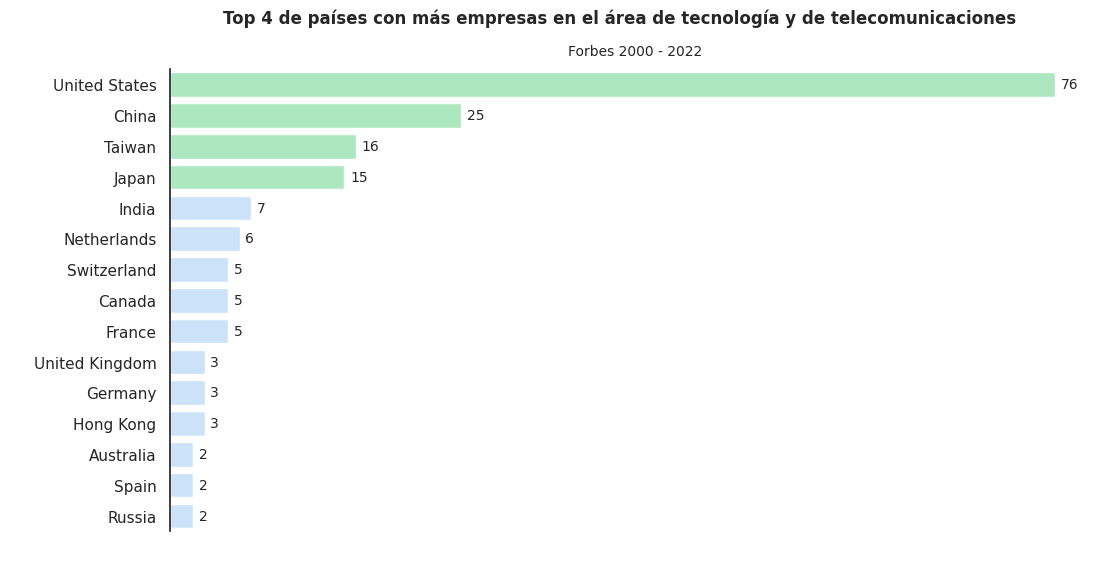

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Destacando el TOP 4 de los paises con mas empresas en el área de tecnología y de telecomunicaciones
colores = ["#A3F1BC" if (pais in top4) else "#C3E2FF" for pais in paises]

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.countplot(data = f_2022, y = "Pais",
                   order = f_2022.value_counts("Pais").head(15).index,
                   palette = colores)
ax.set_xticklabels([])

# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones", size = 12, weight = "bold")
plt.title("Forbes 2000 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 0.5
  cantidad = f'{pos_x:,.0f}'.replace(',','.')
  ax.text(x = pos_x + offset , y = pos_y, s = cantidad, va='center', fontsize=10)

plt.show()

<font color=green size=4> Observaciones e hipótesis: </font>

---

Asi mismo con esta grafica muestra que **USA** tambien lidera el top de empresas en en el área de tecnología y de telecomunicaciones muy por arriba de los paises asiaticos.  


3. ¿Cuál fue el margen de pérdida de las 5 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?

In [ ]:
#@title
f_2022 = forbes_2022_2[(forbes_2022_2['Año'] == 2022) &
                       (forbes_2022_2['Industria'] == 'Hotels, Restaurants & Leisure')]
Empresas_perdidas = f_2022.groupby('Empresa')['Ganancias'].sum().sort_values(ascending=False)
Empresas_perdidas = Empresas_perdidas.reset_index()

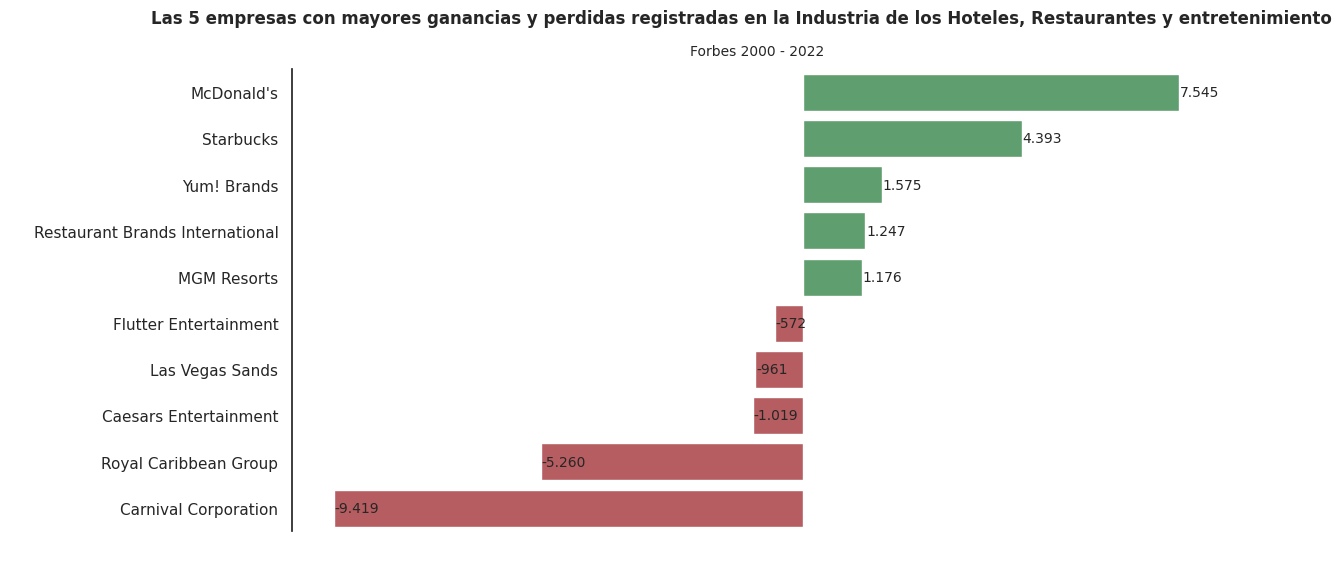

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Definir DataFrame con las 5 empresas con mayor y menor ganancias
top_5 = Empresas_perdidas.head(5)
bottom_5 = Empresas_perdidas.tail(5)
combined_df = pd.concat([top_5, bottom_5,])
top5 = combined_df[:5]
top5

#Definir colores dependiendo de Ganancias
colores = ["g" if empresa in top_5['Empresa'].values else 'r' for empresa in combined_df['Empresa']]

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = combined_df, x = "Ganancias", y = "Empresa", palette = colores)
ax.set_xticklabels([])

# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Las 5 empresas con mayores ganancias y perdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento", size = 12, weight = "bold")
plt.title("Forbes 2000 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 10
  cantidad = f'{pos_x:,.0f}'.replace(',','.')
  ax.text(x = pos_x + offset , y = pos_y, s = cantidad, va='center', fontsize=10)

plt.show()

<font color=green size=4> Observaciones e hipótesis: </font>

---

Con este gráfico, podemos observar que las empresas con mayores ganancias obtenidas fueron los restaurantes de comida rapida y las empresas con menores ganancias fue la industria Hotelera teniendo las peores perdidas la empresa **Carnival Corporation** empresa dedicada a los cruceros.

4. Considerando a la Industria Petrolera en Asia, ¿Cuál o cuáles empresas superaron en más del 20% su margen de rentabilidad?


In [ ]:
#@title
EP_Asia = forbes_2022_2[(forbes_2022_2['Año'] == 2022) &
                       (forbes_2022_2['Continente'] == "Asia" )&
                       (forbes_2022_2['Industria'] == 'Oil & Gas Operations')&
                       (forbes_2022_2['Margen_de_Rentabilidad']  > .20)]

EP_Asia = EP_Asia[["Empresa", 'Margen_de_Rentabilidad']]
EP_Asia = EP_Asia.sort_values("Margen_de_Rentabilidad", ascending = False)
EP_Asia["porcentaje"] = EP_Asia["Margen_de_Rentabilidad"]*100
EP_Asia = EP_Asia.round(0)

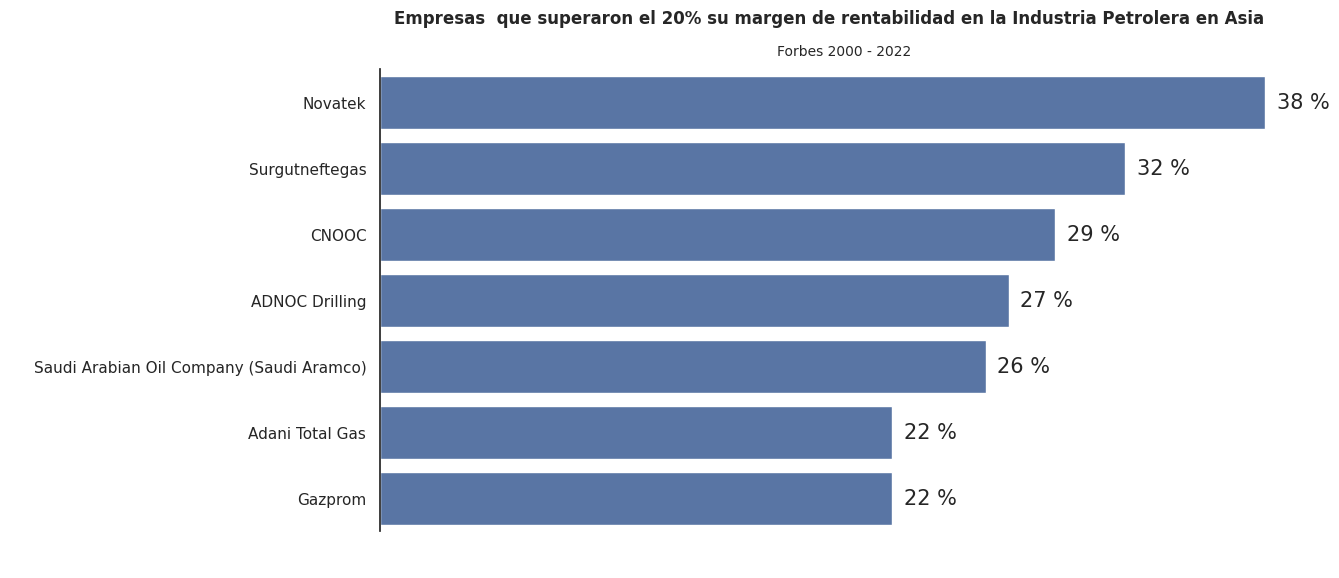

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = EP_Asia, x = "porcentaje", y = "Empresa" , color = "b")
ax.set_xticklabels([])


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Empresas  que superaron el 20% su margen de rentabilidad en la Industria Petrolera en Asia", size = 12, weight = "bold")
plt.title("Forbes 2000 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = .5
  cantidad = f'{pos_x:,.0f}'.replace(',','.') + " %"
  ax.text(x = pos_x + offset , y = pos_y, s = cantidad, va='center', fontsize=15)

plt.show()

<font color=green size=4> Observaciones e hipótesis: </font>

---

Esta grafia muestra las empresas que superaron el 20% de su margen de rentabilidad, lidereando la empresa Novatek siendo el mayor productor independiente de gas natural de Rusia
.

5. ¿Cuáles fueron las empresas norteamericanas con el mayor porcentaje de rentabilidad por industria?

In [ ]:
#@title
EpI_USA = forbes_2022_2[(forbes_2022_2['Año'] == 2022) &
                       (forbes_2022_2['Pais'] == "United States")]

EpI_USA = EpI_USA[["Empresa", "Industria",'Margen_de_Rentabilidad']]

EpI_USA['Margen_de_Rentabilidad'] = pd.to_numeric(EpI_USA['Margen_de_Rentabilidad'], errors='coerce')

EpI_USA = EpI_USA.sort_values("Margen_de_Rentabilidad", ascending = False).head(10)

EpI_USA["porcentaje"] = EpI_USA["Margen_de_Rentabilidad"]*100

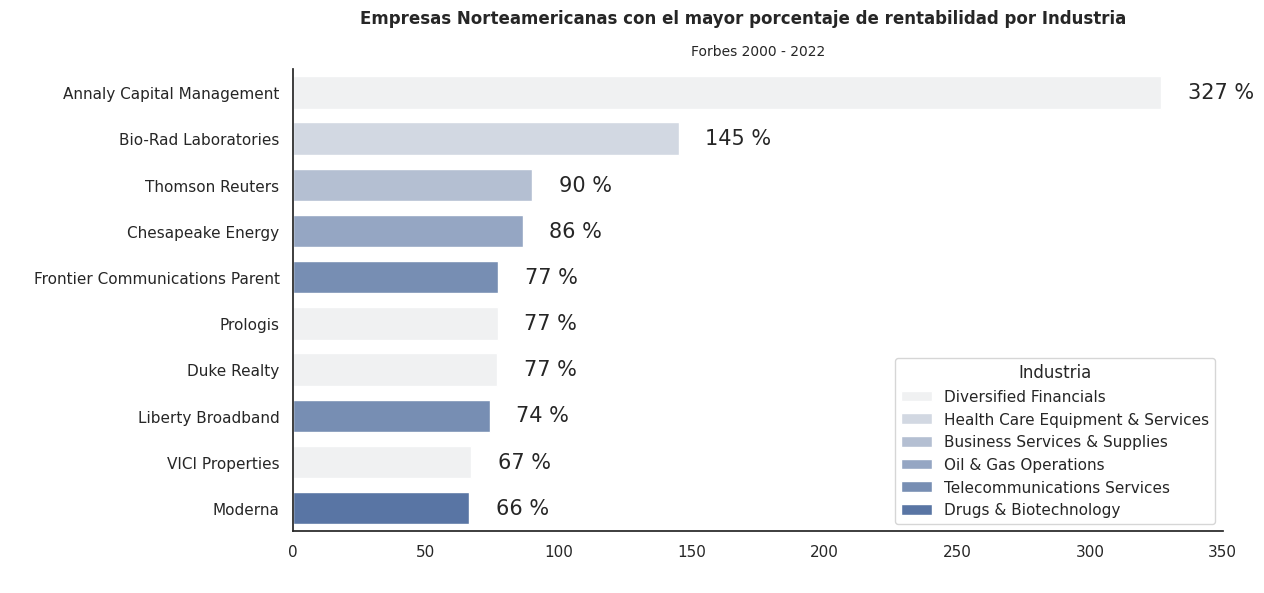

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = EpI_USA, x = "porcentaje", y = "Empresa", hue = "Industria", color = "b", width = .7, dodge = False)
#ax.set_xticklabels([])

# Describiendo el límite mínimo y máximo del eje Y

plt.xlim(0, 350)

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 10
  cantidad = f'{pos_x:,.0f}' + " %"

  # Verificar si las coordenadas son finitas
  if np.isfinite(pos_x) and np.isfinite(pos_y):
      ax.text(x=pos_x + offset, y=pos_y, s=cantidad, va='center', fontsize=15)


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Empresas Norteamericanas con el mayor porcentaje de rentabilidad por Industria", size = 12, weight = "bold")
plt.title("Forbes 2000 - 2022", fontsize = 10, pad =10)
ax.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0), title='Industria', fancybox = True)
plt.xlabel(" ")
plt.ylabel(" ")


plt.show()

6. Excluyendo a la industria Bancaria, ¿Cuáles fueron las empresas europeas con  mayores pérdidas registradas por industria a nivel global?

In [ ]:
Ep_Euro = forbes_2022_2[(forbes_2022_2['Año'] == 2022) &
                       (forbes_2022_2['Continente'] == "Europe")&
                       (forbes_2022_2['Industria'] != "Banking") ]

Ep_Euro = Ep_Euro[["Empresa", "Industria",'Ganancias']]
Ep_Euro = Ep_Euro.sort_values("Ganancias", ascending = False).tail(10)
Ep_Euro

,Empresa,Industria,Ganancias
14472,Flutter Entertainment,"Hotels, Restaurants & Leisure",-571.9
10377,Finatis,Trading Companies,-582.7
10390,Unibail-Rodamco,Construction,-1149.0
9513,Phoenix Group Holdings,Insurance,-1182.8
9504,Prudential,Insurance,-1984.9
8863,Deutsche Lufthansa,Transportation,-2589.7
9529,International Airlines,Transportation,-3480.8
10393,ATOS,IT Software & Services,-3501.0
10383,Air France-KLM,Transportation,-3886.4
12733,Telecom Italia,Telecommunications Services,-10188.7


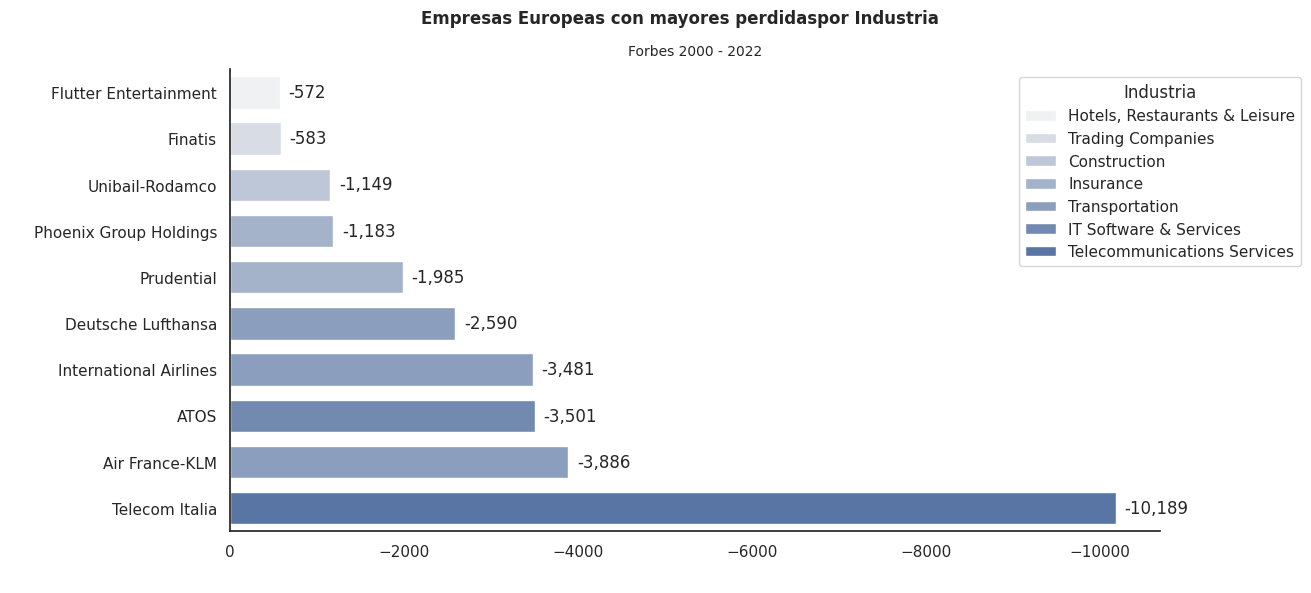

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = Ep_Euro, x = "Ganancias", y = "Empresa", hue = "Industria", color = "b", width = .7, dodge = False)
#ax.set_xticklabels([])

# Invertir el eje x
ax.invert_xaxis()

# Describiendo el límite mínimo y máximo del eje Y

#plt.xlim(0, 350)

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = - 100
  cantidad = f'{pos_x:,.0f}'

  # Verificar si las coordenadas son finitas
  if np.isfinite(pos_x) and np.isfinite(pos_y):
      ax.text(x=pos_x + offset, y=pos_y, s=cantidad, va='center', fontsize=12)


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Empresas Europeas con mayores perdidaspor Industria", size = 12, weight = "bold")
plt.title("Forbes 2000 - 2022", fontsize = 10, pad =10)
ax.legend(loc= 'upper center', bbox_to_anchor=(1.0, 1.0), title='Industria', fancybox = True)
plt.xlabel(" ")
plt.ylabel(" ")


plt.show()



7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 30000 millones de dólares?


In [31]:
#@title
Ep_bank = forbes_2022_2[(forbes_2022_2['Año'] == 2022) &
                       (forbes_2022_2['Industria'] == "Banking")&
                       (forbes_2022_2['Activos'] <= 30000)]
Ep_bank

,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Año,Margen_de_Rentabilidad,Rentabilidad de los Activos (ROA),Codigo,Continente
13216,Grupo Inbursa,Banking,Mexico,3451.0,1029.7,27900.0,11277.0,2022,0.298377,0.036907,MEX,North America
15709,Halyk Bank,Banking,Kazakhstan,2933.0,1083.6,27809.0,2967.0,2022,0.369451,0.038966,KAZ,Europe
15710,Halyk Bank,Banking,Kazakhstan,2933.0,1083.6,27809.0,2967.0,2022,0.369451,0.038966,KAZ,Asia
15757,Vietnam Technological & Commercial Joint Stock...,Banking,Vietnam,2073.0,787.1,24955.0,6741.0,2022,0.379691,0.031541,VNM,Asia


In [120]:
#@title
t_ingresos = Ep_bank['Ingresos'].sum()
t_ganancias = Ep_bank['Ganancias'].sum()
t_activos = Ep_bank['Activos'].sum()

data = {"concepto" : ["Ingresos", "Ganancias", "Activos"] ,
        "Mdlls": [t_ingresos, t_ganancias, t_activos ]}
data = pd.DataFrame(data)
data.sort_values("Mdlls", ascending = False)
data

,concepto,Mdlls
0,Ingresos,11390.0
1,Ganancias,3984.0
2,Activos,108473.0


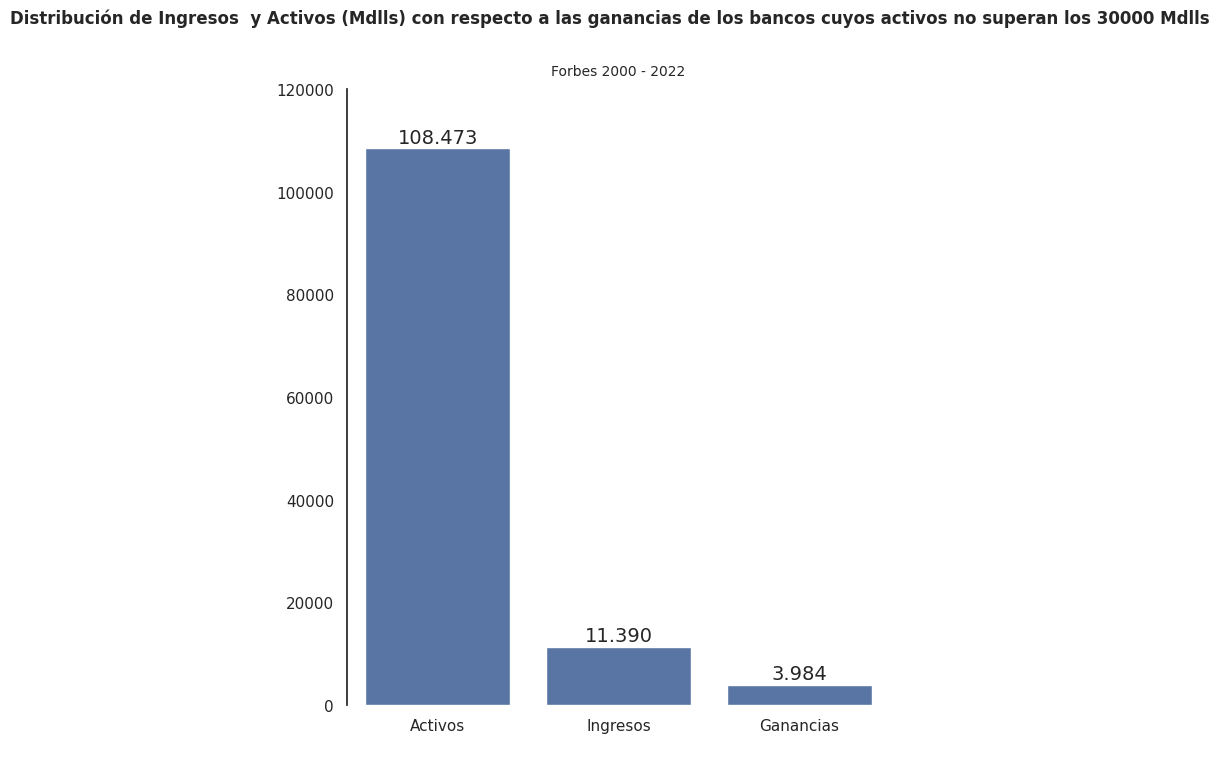

In [124]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(7, 8))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = data.sort_values("Mdlls", ascending = False), x = "concepto", y = "Mdlls" , color = "b")
#ax.set_xticklabels([])

# Describiendo el límite mínimo y máximo del eje Y
plt.ylim(0, 120000)


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Distribución de Ingresos  y Activos (Mdlls) con respecto a las ganancias de los bancos cuyos activos no superan los 30000 Mdlls", size = 12, weight = "bold")
plt.title("Forbes 2000 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")


# Escribiendo los valores de cada columna (eje Y) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_x() + barra.get_width() / 2
  pos_y = barra.get_height()
  offset = 1000
  cantidad = f'{pos_y:,.0f}'.replace(',','.')
  ax.text(x = pos_x, y = pos_y + offset, s = cantidad, ha='center', fontsize=14)


plt.show()

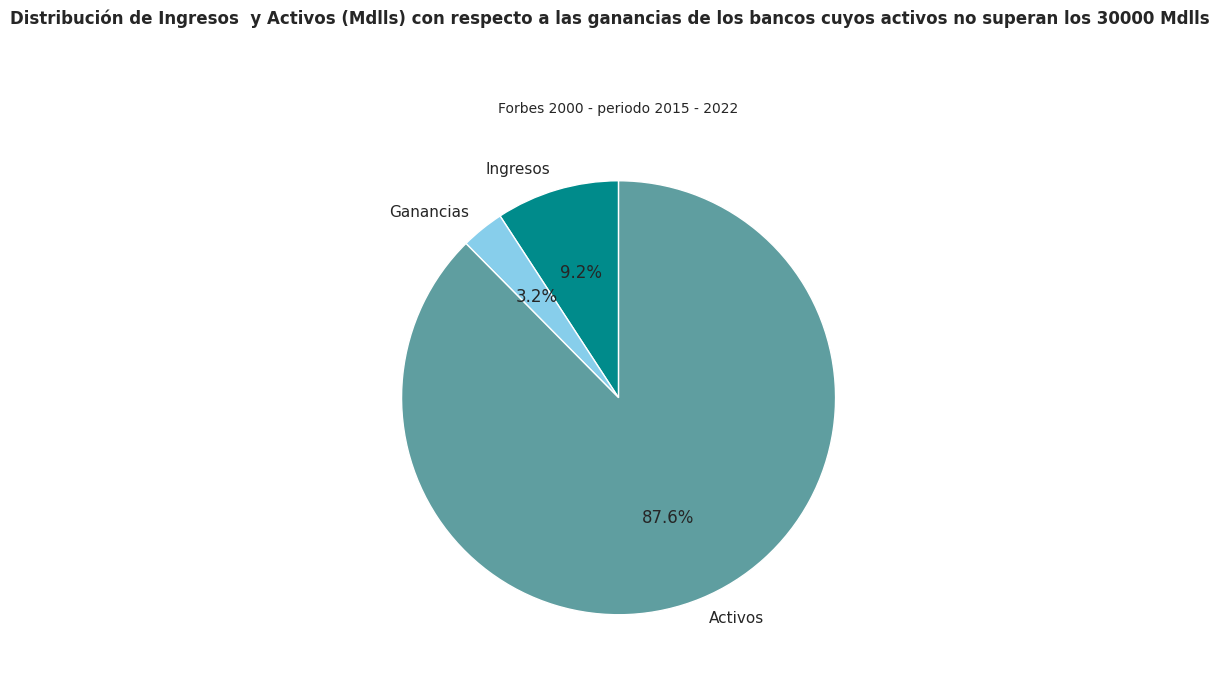

In [128]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(7, 8))

colors = ['darkcyan', 'skyblue', 'cadetblue']

#Generar la grafica de barras y eliminar la info del eje X
ax.pie(data.Mdlls, labels = data.concepto , colors = colors,  autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Distribución de Ingresos  y Activos (Mdlls) con respecto a las ganancias de los bancos cuyos activos no superan los 30000 Mdlls", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)


plt.show()


8. Considerando el histórico de valores de las acciones en el año 2022 de las 5 empresas de tu elección (Paso 2), Indica ¿Cuál fue la mejor semana para comprar y cuál para vender respectivamente? (Se compra cuando el precio es bajo, y se vende cuando el precio es alto)

In [80]:
# Seleccion de las empresas:
nombres_empresas = ['APPLE', 'AMAZON', 'GOOGLE', 'META', 'MICROSOFT']

# Creo una lista de DataFrames de empresas:
empresas = []
for empresa in nombres_empresas:
    empresas.append(eval(empresa)[['fecha', 'apertura', 'cierre', 'maximo', 'minimo']])

# Creo una lista para almacenar los resultados
valores = []

# Iterar sobre los DataFrames
for i, empresa in enumerate(empresas):
    # Convertir la columna 'Fecha' al formato de fecha
    empresa['fecha'] = pd.to_datetime(empresa["fecha"], unit='ms')

    # Establecer la columna 'Fecha' como índice
    empresa.set_index('fecha', inplace=True)

    # Eliminar los duplicados en los datos de la empresa
    empresa = empresa[~empresa.index.duplicated(keep='first')]

    # Calcular la diferencia de precios entre el cierre y la apertura de cada día
    empresa['diferencia'] = empresa['cierre'] - empresa['apertura']

    # Agrupar los datos por semana y calcular el promedio de la diferencia de precios por semana
    empresa_semanal = empresa.resample('W').mean()

    # Identificar la mejor semana para comprar y vender
    mejor_semana_compra = empresa_semanal['diferencia'].idxmax()
    mejor_semana_venta = empresa_semanal['diferencia'].idxmin()

    # Encontrar la fila correspondiente al valor de Diferencia deseado
    valor_max = empresa_semanal[empresa_semanal['diferencia'] == empresa_semanal.diferencia.max()]
    valor_min = empresa_semanal[empresa_semanal['diferencia'] == empresa_semanal.diferencia.min()]

    # Obtener el valor de Máximo/Mínimo de la fila diferencia
    valor_max = valor_max['maximo'].values[0] if not valor_max.empty else 0.0
    valor_min = valor_min['maximo'].values[0] if not valor_min.empty else 0.0

    # Agregar los valortes en una lista
    valores.append({
        'Empresa': nombres_empresas[i],
        'mejor_semana_para_comprar': mejor_semana_compra,
        'valor_de_compra': round(valor_max,2),
        'mejor_semana_para_vender': mejor_semana_venta,
        'valor_de_venta': round(valor_min,2)
    })

# Crear DataFrame Compra - Venta
compra_venta = pd.DataFrame(valores)
compra_venta

<ipython-input-80-4ac1b589a1b3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresa['fecha'] = pd.to_datetime(empresa["fecha"], unit='ms')
<ipython-input-80-4ac1b589a1b3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empresa['fecha'] = pd.to_datetime(empresa["fecha"], unit='ms')
<ipython-input-80-4ac1b589a1b3>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Empresa,mejor_semana_para_comprar,valor_de_compra,mejor_semana_para_vender,valor_de_venta
0,APPLE,2022-05-29,144.21,2022-11-06,149.47
1,AMAZON,2022-03-20,153.54,2022-01-23,156.97
2,GOOGLE,2022-07-10,116.96,2022-11-06,91.28
3,META,2022-07-10,171.24,2022-06-12,191.27
4,MICROSOFT,2022-02-27,294.01,2022-01-23,309.87


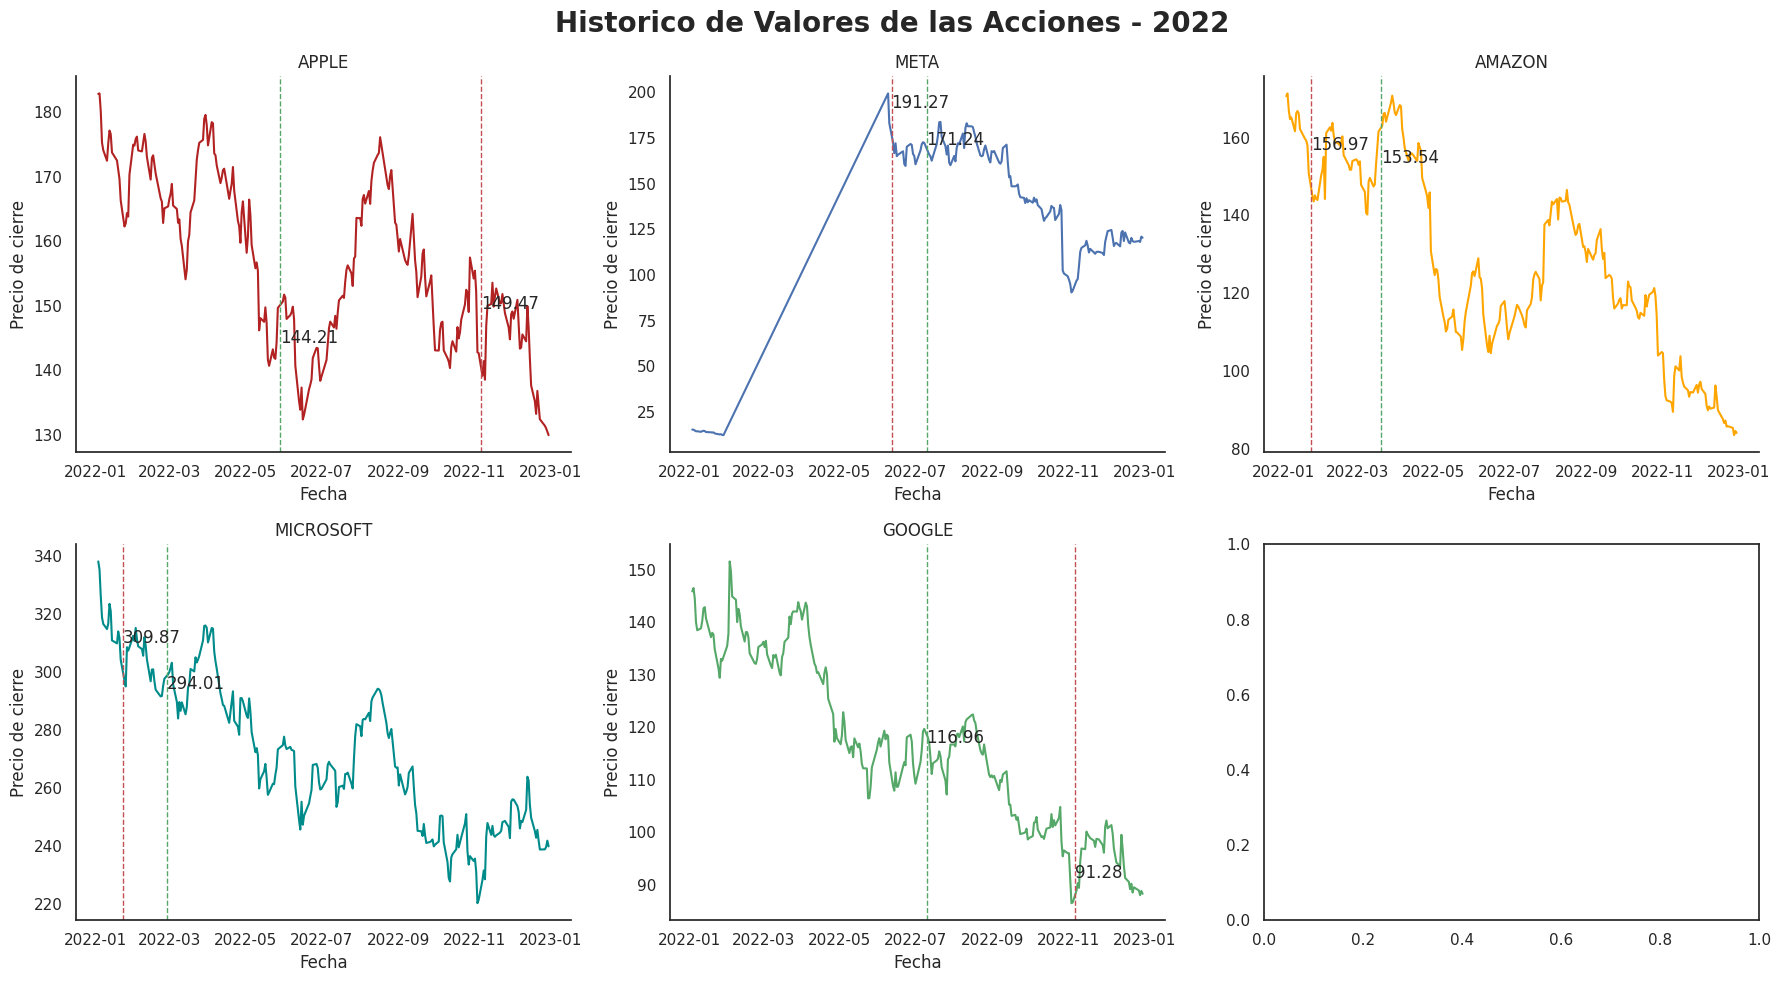

In [85]:

# Crear una figura y los subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2, 3, figsize=(18, 10))

# Configurar el primer subplot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Precio de cierre')
ax1.set_title('APPLE')

# Obtener los valores de compra y venta
empresa = 'APPLE'
mejor_semana_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_comprar'].values[0]
valor_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_compra'].values[0]
mejor_semana_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_vender'].values[0]
valor_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_venta'].values[0]

# Generar la primera gráfica
sns.lineplot(data=APPLE, x='fecha', y='maximo', ax=ax1, color='firebrick')
# Trazar la línea de compra
ax1.axvline(x = mejor_semana_compra , color="g", linestyle='--', linewidth=1)
ax1.axvline(x = mejor_semana_venta , color="r", linestyle='--', linewidth=1)

# Agregar Valor
ax1.text(mejor_semana_compra, valor_compra, f"{valor_compra}")
ax1.text(mejor_semana_venta, valor_venta, f"{valor_venta}")

# Configurar el segundo subplot
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel('Fecha')
ax2.set_ylabel('Precio de cierre')
ax2.set_title('META')

# Obtener los valores de compra y venta
empresa = 'META'
mejor_semana_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_comprar'].values[0]
valor_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_compra'].values[0]
mejor_semana_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_vender'].values[0]
valor_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_venta'].values[0]

# Generar la segunda gráfica
sns.lineplot(data=META, x='fecha', y='maximo', ax=ax2, color='b')
ax2.axvline(x = mejor_semana_compra , color="g", linestyle='--', linewidth=1)
ax2.axvline(x = mejor_semana_venta , color="r", linestyle='--', linewidth=1)

# Agregar Valor
ax2.text(mejor_semana_compra, valor_compra, f"{valor_compra}")
ax2.text(mejor_semana_venta, valor_venta, f"{valor_venta}")

# Configurar el tercer subplot
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlabel('Fecha')
ax3.set_ylabel('Precio de cierre')
ax3.set_title('AMAZON')

# Obtener los valores de compra y venta
empresa = 'AMAZON'
mejor_semana_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_comprar'].values[0]
valor_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_compra'].values[0]
mejor_semana_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_vender'].values[0]
valor_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_venta'].values[0]

# Generar la tercera gráfica
sns.lineplot(data=AMAZON, x='fecha', y='maximo', ax=ax3, color='orange')
ax3.axvline(x = mejor_semana_compra , color="g", linestyle='--', linewidth=1)
ax3.axvline(x = mejor_semana_venta , color="r", linestyle='--', linewidth=1)

# Agregar Valor
ax3.text(mejor_semana_compra, valor_compra, f"{valor_compra}")
ax3.text(mejor_semana_venta, valor_venta, f"{valor_venta}")

# Configurar la cuarta subplot
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xlabel('Fecha')
ax4.set_ylabel('Precio de cierre')
ax4.set_title('MICROSOFT')

# Obtener los valores de compra y venta
empresa = 'MICROSOFT'
mejor_semana_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_comprar'].values[0]
valor_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_compra'].values[0]
mejor_semana_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_vender'].values[0]
valor_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_venta'].values[0]

# Generar la cuarta gráfica
sns.lineplot(data=MICROSOFT, x='fecha', y='maximo', ax=ax4, color='darkcyan')
ax4.axvline(x = mejor_semana_compra , color="g", linestyle='--', linewidth=1)
ax4.axvline(x = mejor_semana_venta , color="r", linestyle='--', linewidth=1)

# Agregar Valor
ax4.text(mejor_semana_compra, valor_compra, f"{valor_compra}")
ax4.text(mejor_semana_venta, valor_venta, f"{valor_venta}")

# Configurar la quinta subplot
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.set_xlabel('Fecha')
ax5.set_ylabel('Precio de cierre')
ax5.set_title('GOOGLE')

# Obtener los valores de compra y venta
empresa = 'GOOGLE'
mejor_semana_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_comprar'].values[0]
valor_compra = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_compra'].values[0]
mejor_semana_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'mejor_semana_para_vender'].values[0]
valor_venta = compra_venta.loc[compra_venta['Empresa'] == empresa, 'valor_de_venta'].values[0]

# Agregar Valor
ax5.text(mejor_semana_compra, valor_compra, f"{valor_compra}")
ax5.text(mejor_semana_venta, valor_venta, f"{valor_venta}")

# Generar la quinta gráfica
sns.lineplot(data=GOOGLE, x='fecha', y='maximo', ax=ax5, color='g')
ax5.axvline(x = mejor_semana_compra , color="g", linestyle='--', linewidth=1)
ax5.axvline(x = mejor_semana_venta , color="r", linestyle='--', linewidth=1)

# Ajustar los espacios entre las gráficas
plt.suptitle('Historico de Valores de las Acciones - 2022', fontsize=20, fontweight='bold')
plt.tight_layout()

# Mostrar las gráficas
plt.show()

#Cuestionario B

Las siguientes preguntas se refieren al ranking Forbes 2000 considerando el periodo 2015 - 2022:

1. ¿Cuál es el Top 10 de países con más empresas en Forbes para el periodo indicado?

In [ ]:
#@title
#Obtener la base de Top 10 de países con más empresas en Forbes 2022
f_2022 = forbes_2022_2.drop_duplicates(subset='Empresa')
paises = f_2022.value_counts("Pais").head(25).index
top10 = paises[:10]

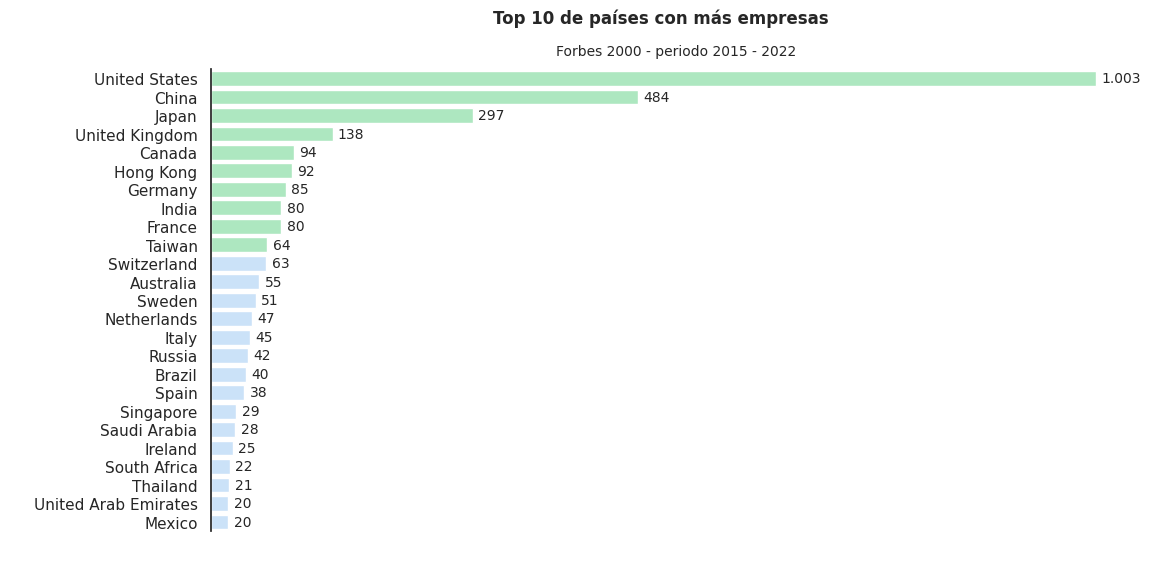

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Destacando el TOP 10 de los paises con mas empresas
colores = ["#A3F1BC" if (pais in top10) else "#C3E2FF" for pais in paises]


#Generar la grafica de barras y eliminar la info del eje X
ax = sns.countplot(data = f_2022, y = "Pais",
                   order = f_2022.value_counts("Pais").head(25).index,
                   palette = colores)
ax.set_xticklabels([])

# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Top 10 de países con más empresas", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 6
  cantidad = f'{pos_x:,.0f}'.replace(',','.')
  ax.text(x = pos_x + offset , y = pos_y, s = cantidad, va='center', fontsize=10)

plt.show()

<font color=green size=4> Observaciones e hipótesis: </font>

---

Ahora, con el gráfico de barras 100% apiladas, lo que se destaca en nuestros datos son las **proporciones relativas** en cada año.

Es posible notar que en el año 2020, **más del 20% de aplicantes** manifestaron que la situación económica de las familias había empeorado.

2. ¿Cuál es el Top 5 de países con más empresas en el área de tecnología y de telecomunicaciones?

In [ ]:
#@title
#Obtener la base de Top 4 de países con más empresas en el área de tecnología y de telecomunicaciones en Forbes 2022
f_2022 = forbes_2022_2['Industria'].isin(['IT Software & Services',
                                                        'Telecommunications Services',
                                                        'Technology Hardware & Equipment',
                                                        'Semiconductors'])
f_2022 = forbes_2022_2.drop_duplicates(subset='Empresa')
paises = f_2022.value_counts("Pais").sort_values(ascending=False).head(20).index
top5 = paises[:5]

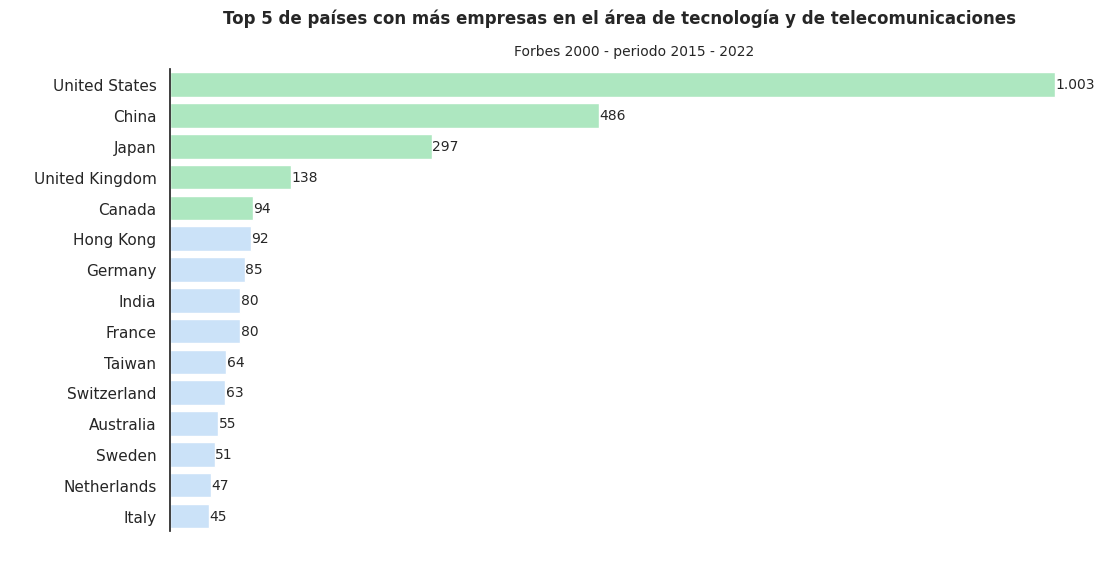

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Destacando el TOP 4 de los paises con mas empresas en el área de tecnología y de telecomunicaciones
colores = ["#A3F1BC" if (pais in top5) else "#C3E2FF" for pais in paises]

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.countplot(data = f_2022, y = "Pais",
                   order = f_2022.value_counts("Pais").head(15).index,
                   palette = colores)
ax.set_xticklabels([])

# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Top 5 de países con más empresas en el área de tecnología y de telecomunicaciones", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 0.5
  cantidad = f'{pos_x:,.0f}'.replace(',','.')
  ax.text(x = pos_x + offset , y = pos_y, s = cantidad, va='center', fontsize=10)

plt.show()


3. ¿Cuál fue el margen de pérdida de las 10 empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y entretenimiento?


In [ ]:
#@title
f_2022 = forbes_2022_2[(forbes_2022_2['Industria'] == 'Hotels, Restaurants & Leisure')]
Em_per = f_2022.groupby('Empresa')['Ganancias'].sum().sort_values(ascending=False)
Em_per = Em_per.reset_index()


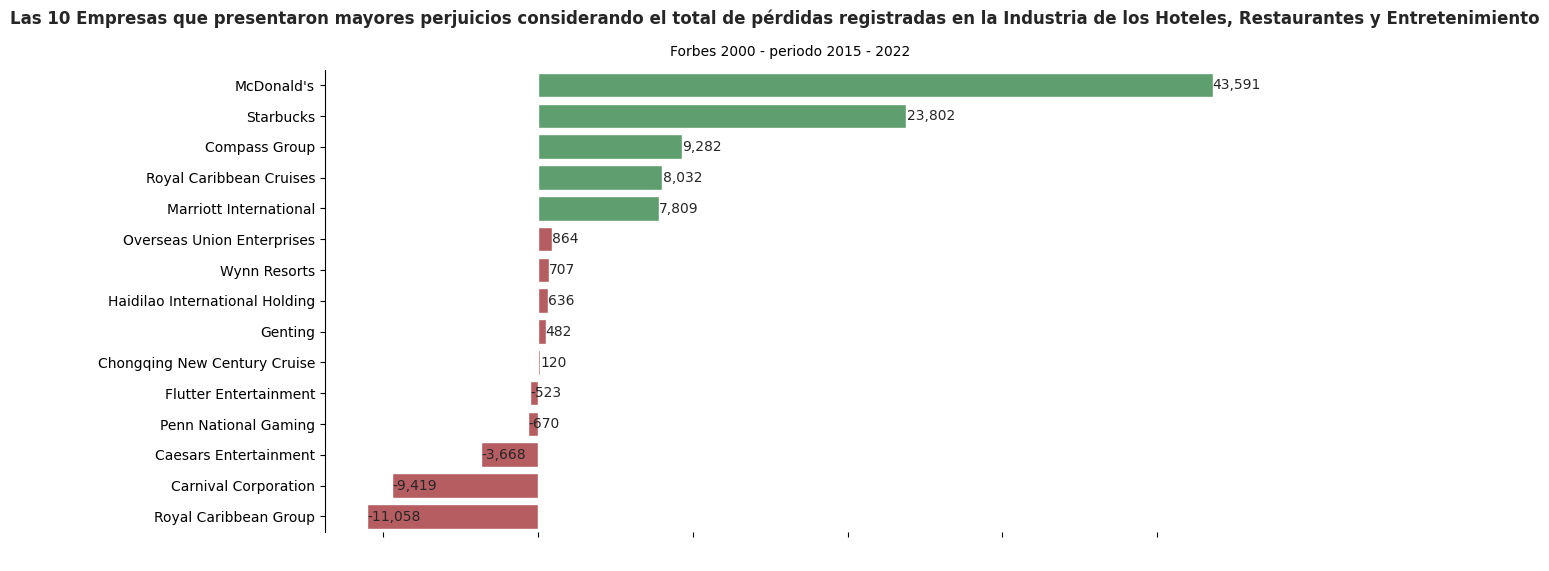

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Definir DataFrame con las 5 empresas con mayor y menor ganancias
top_5 = Em_per.head(5)
bottom_5 = Em_per.tail(10)
combined_df = pd.concat([top_5, bottom_5,])
top5 = combined_df[:5]
top5

#Definir colores dependiendo de Ganancias
colores = ["g" if empresa in top_5['Empresa'].values else 'r' for empresa in combined_df['Empresa']]

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = combined_df, x = "Ganancias", y = "Empresa", palette = colores)
ax.set_xticklabels([])

# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Las 10 Empresas que presentaron mayores perjuicios considerando el total de pérdidas registradas en la Industria de los Hoteles, Restaurantes y Entretenimiento", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 12
  cantidad = f'{pos_x:,.0f}'.replace(',',',')
  ax.text(x = pos_x + offset , y = pos_y, s = cantidad, va='center', fontsize=10)

plt.show()


4. Considerando a la Industria Petrolera en las Américas, ¿Cuál o cuáles empresas superaron en más del 20% la rentabilidad de sus activos?

In [ ]:
#@title
EP_America = forbes_2022_2[(forbes_2022_2['Continente'].isin(['North America', 'South America']))&
                       (forbes_2022_2['Industria'] == 'Oil & Gas Operations')&
                       (forbes_2022_2['Margen_de_Rentabilidad']  > .20)]

EP_America = EP_America[["Empresa", 'Margen_de_Rentabilidad']]
EP_America = EP_America.sort_values("Margen_de_Rentabilidad", ascending = False)
EP_America["porcentaje"] = EP_America["Margen_de_Rentabilidad"]*100
EP_America = EP_America.round(0).head(25)


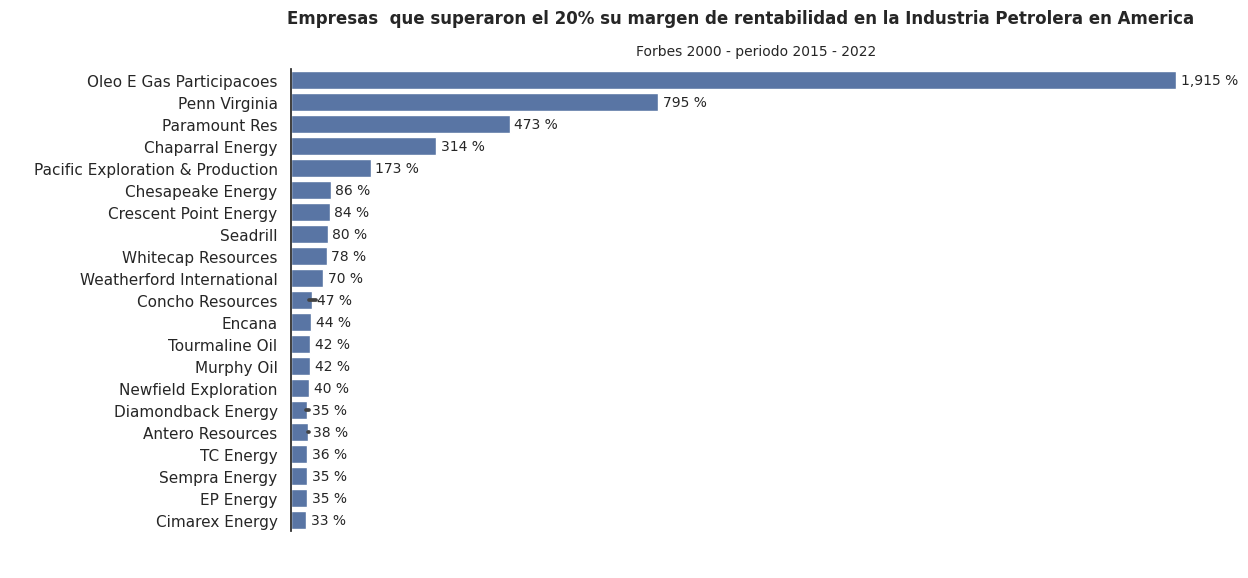

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = EP_America, x = "porcentaje", y = "Empresa", color = "b")
ax.set_xticklabels([])


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Empresas  que superaron el 20% su margen de rentabilidad en la Industria Petrolera en America", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 10
  cantidad = f'{pos_x:,.0f}'.replace(',',',') + " %"
  ax.text(x = pos_x + offset , y = pos_y, s = cantidad, va='center', fontsize=10)

plt.show()


5. ¿Cuáles fueron las empresas europeas con el mayor porcentaje de rentabilidad por industria?

In [68]:
#@title
EmR_Euro= forbes_2022_2[forbes_2022_2['Continente'] == "Europe"]

EmR_Euro2= EmR_Euro[["Empresa", "Industria",'Margen_de_Rentabilidad']]
EmR_Euro2["porcentaje"] = EmR_Euro2["Margen_de_Rentabilidad"]*100
EmR_Euro2 = EmR_Euro2.groupby(["Empresa", "Industria"])["porcentaje"].sum().sort_values(ascending=False).round(2)
EmR_Euro2 = EmR_Euro2.reset_index()
EmR_Euro2.head(20)

<ipython-input-68-2b252e02b6eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EmR_Euro2["porcentaje"] = EmR_Euro2["Margen_de_Rentabilidad"]*100


,Empresa,Industria,porcentaje
0,Porsche Automobil Holding,Consumer Durables,29147.45
1,Sofina,Diversified Financials,5540.97
2,3i Group,Diversified Financials,3518.26
3,Kinnevik,Diversified Financials,3399.78
4,Segro,Diversified Financials,1582.14
5,Great Portland Estates,Real Estate,1254.06
6,Segro,Real Estate,912.80
7,Derwent London,Real Estate,824.36
8,British Land,Real Estate,727.40
9,Gecina,Real Estate,717.67


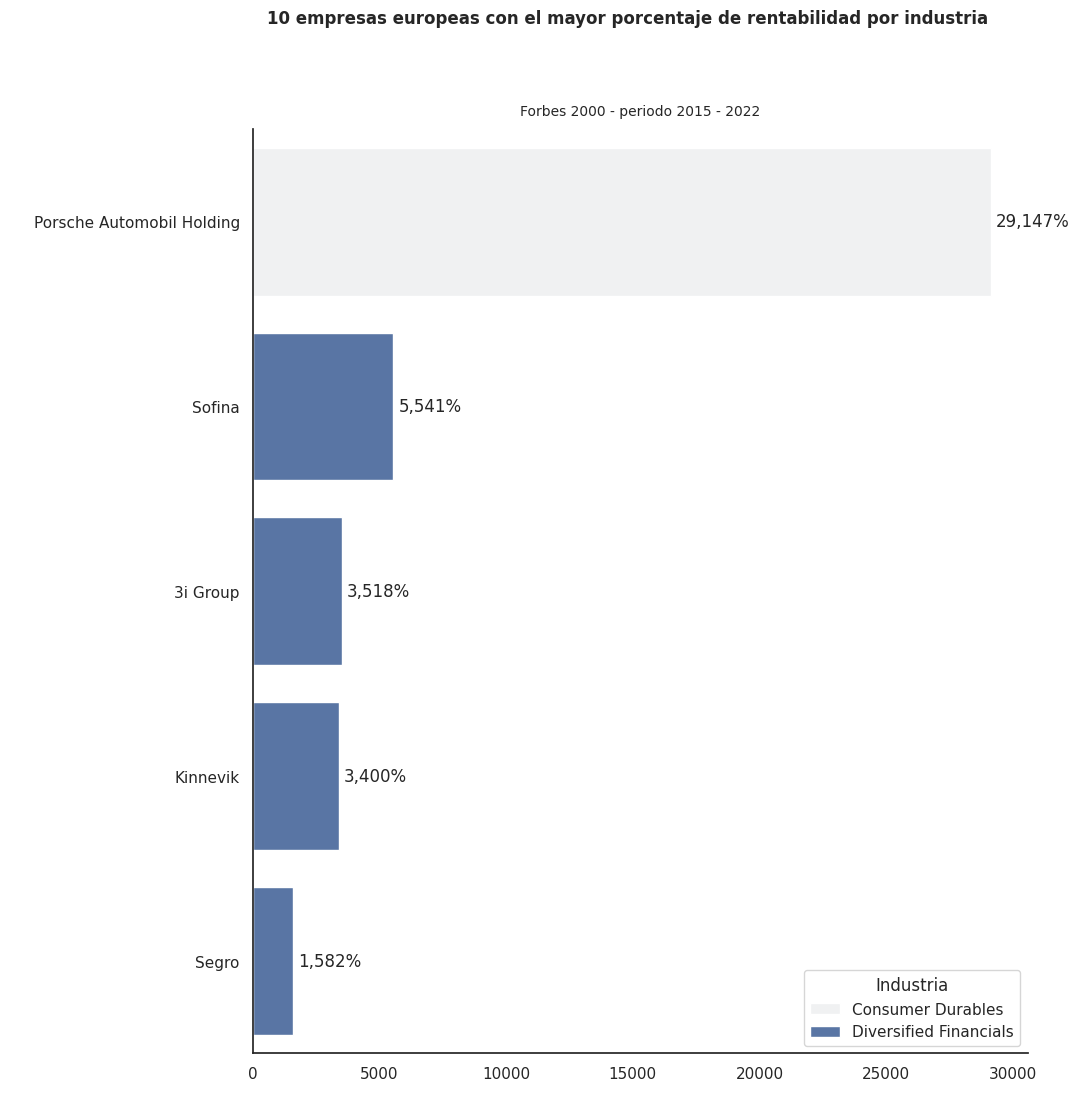

In [76]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(10 , 12))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)


#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = EmR_Euro2.head(5) , x = "porcentaje" , y = "Empresa", hue = "Industria" , dodge = False, color = "b", width = .8)
#x.set_xticklabels([])

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = 200
  cantidad = f'{pos_x:,.0f}'+ "%"

  # Verificar si las coordenadas son finitas
  if np.isfinite(pos_x) and np.isfinite(pos_y):
      ax.text(x=pos_x + offset, y=pos_y, s=cantidad, va='center', fontsize=12)


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("10 empresas europeas con el mayor porcentaje de rentabilidad por industria", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")


plt.show()


6. ¿Cuáles fueron las 10 empresas norteamericanas con  mayores pérdidas registradas por industria a nivel global?

In [51]:
#@title
Emp_USA = forbes_2022_2[forbes_2022_2['Continente'] == 'North America']
Emp_USA = Emp_USA.groupby('Empresa')[["Industria",'Ganancias']].first()
Emp_USA = Emp_USA.sort_values("Ganancias", ascending= False)
Emp_USA = Emp_USA.reset_index()
Emp_USA.tail(10)

,Empresa,Industria,Ganancias
1125,Bausch Health Companies,Drugs & Biotechnology,-4260.0
1126,AirBnB,Business Services & Supplies,-4584.7
1127,Rivian,Consumer Durables,-4688.0
1128,Lumen Technologies,Telecommunications Services,-5269.0
1129,Apache,Oil & Gas Operations,-5403.0
1130,Royal Caribbean Group,"Hotels, Restaurants & Leisure",-5797.5
1131,Uber,IT Software & Services,-8506.0
1132,Bristol Myers Squibb,Drugs & Biotechnology,-9015.0
1133,Carnival Corporation,"Hotels, Restaurants & Leisure",-9419.0
1134,Baker Hughes Company,Oil & Gas Operations,-10114.0


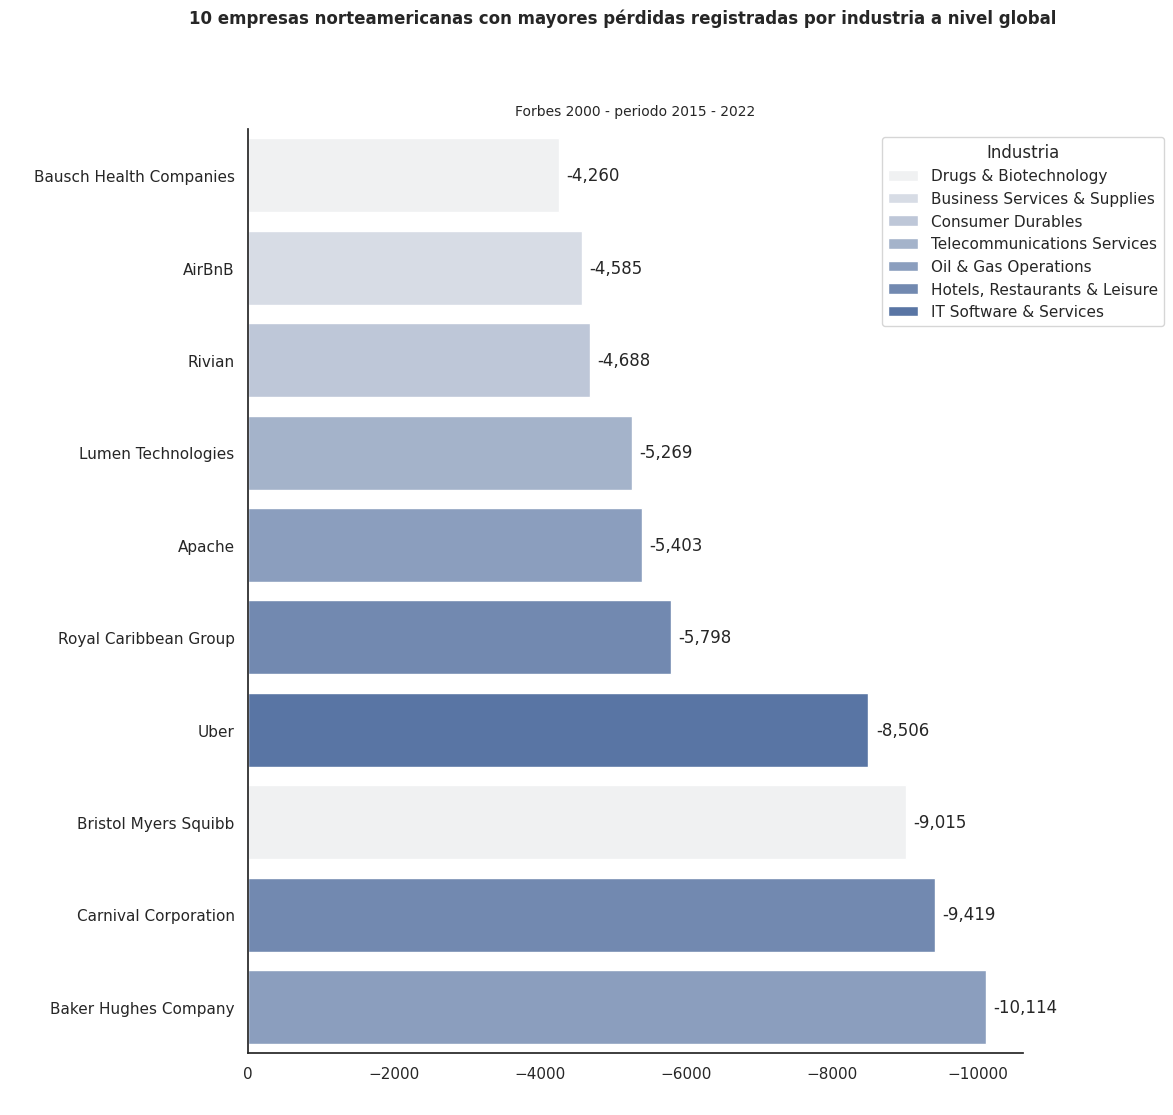

In [78]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(10 , 12))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Definir DataFrame con las 5 empresas con mayor y menor ganancias
top_3 = Emp_USA .head(3)
bottom_5 = Emp_USA.tail(10)
combined_df = pd.concat([top_3, bottom_5,])

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = Emp_USA.tail(10) , x = "Ganancias", y = "Empresa", hue = "Industria" , dodge = False, color = "b")
#x.set_xticklabels([])

# Invertir el eje x
ax.invert_xaxis()

# Escribiendo los valores de cada barra (eje X) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_width()
  pos_y = barra.get_y() + barra.get_height() / 2
  offset = - 100
  cantidad = f'{pos_x:,.0f}'

  # Verificar si las coordenadas son finitas
  if np.isfinite(pos_x) and np.isfinite(pos_y):
      ax.text(x=pos_x + offset, y=pos_y, s=cantidad, va='center', fontsize=12)

# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("10 empresas norteamericanas con mayores pérdidas registradas por industria a nivel global", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)
ax.legend(loc= 'upper center', bbox_to_anchor=(1.0, 1.0), title='Industria', fancybox = True)
plt.xlabel(" ")
plt.ylabel(" ")


plt.show()


7. ¿Cuál fue la distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones de dólares?

In [86]:
#@title
Ep_bank_B = forbes_2022_2[(forbes_2022_2['Industria'] == "Banking")&
                       (forbes_2022_2['Activos'] <= 15000)]

Ep_bank_B

,Empresa,Industria,Pais,Ingresos,Ganancias,Activos,Valor de Mercado,Año,Margen_de_Rentabilidad,Rentabilidad de los Activos (ROA),Codigo,Continente
2985,INTL FCStone,Banking,United States,24469.0,53.9,5217.0,539.0,2016,0.002203,0.010332,USA,North America
3575,INTL FCStone,Banking,United States,17428.0,51.1,6291.0,681.0,2017,0.002932,0.008123,USA,North America
4094,INTL FCStone,Banking,United States,32314.0,4.8,7204.0,883.0,2018,0.000149,0.000666,USA,North America
9694,Moscovskiy Oblastnoi Bank,Banking,Russia,2561.0,1702.4,4540.0,363.0,2017,0.664740,0.374978,RUS,Europe
9695,Moscovskiy Oblastnoi Bank,Banking,Russia,2561.0,1702.4,4540.0,363.0,2017,0.664740,0.374978,RUS,Asia
9806,Sberbank,Banking,Russia,47578.0,10637.8,410.0,59898.0,2020,0.223587,25.945854,RUS,Europe
9807,Sberbank,Banking,Russia,47578.0,10637.8,410.0,59898.0,2020,0.223587,25.945854,RUS,Asia
12397,Sparebanken Nord-Norge,Banking,Norway,481.0,1956.4,13700.0,1006.0,2021,4.067360,0.142803,NOR,Europe
12621,Banca IFIS,Banking,Italy,1168.0,761.0,9175.0,2071.0,2017,0.651541,0.082943,ITA,Europe
13489,IndusInd Bank,Banking,India,1894.0,277.7,14943.0,7793.0,2015,0.146621,0.018584,IND,Asia


In [90]:
#@title
t_ingresos = Ep_bank_B['Ingresos'].sum()
t_ganancias = Ep_bank_B['Ganancias'].sum()
t_activos = Ep_bank_B['Activos'].sum()

data = {"concepto" : ["Ingresos", "Ganancias", "Activos"] ,
        "Mdlls": [t_ingresos, t_ganancias, t_activos ]}
data = pd.DataFrame(data)
data = data.sort_values("Mdlls", ascending = False)
data

,concepto,Mdlls
0,Ingresos,209626.0
2,Activos,184588.0
1,Ganancias,47089.0


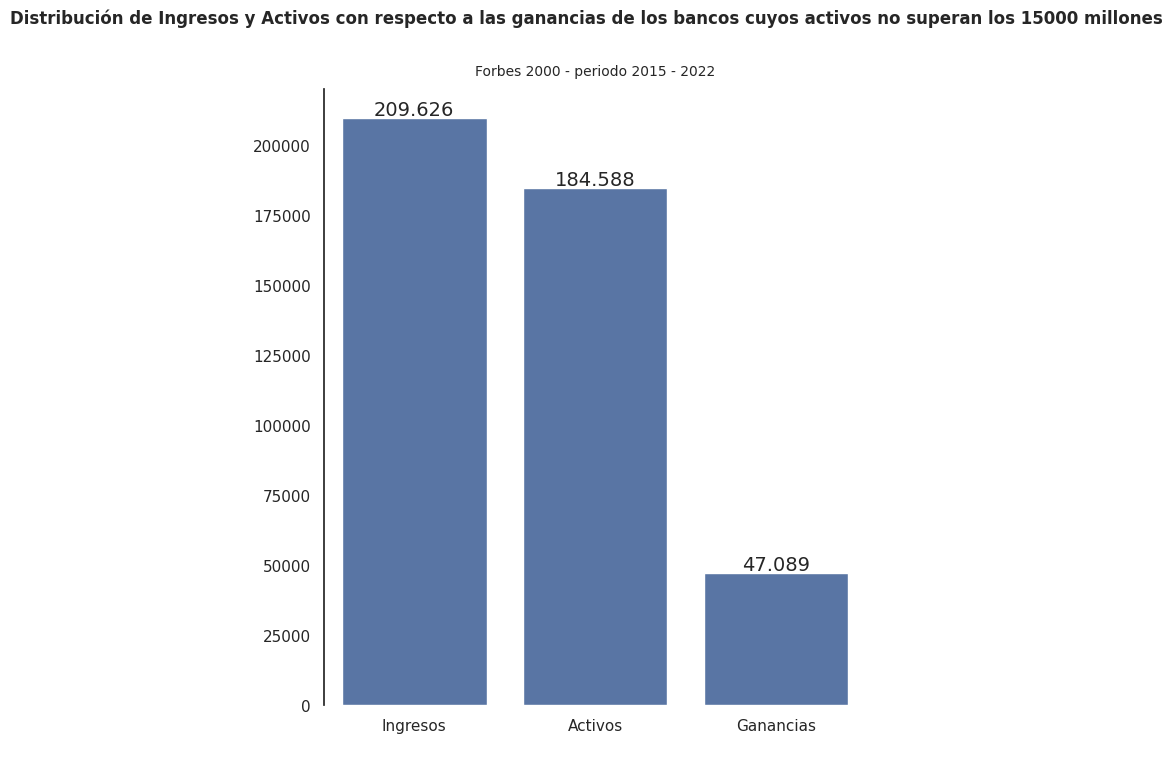

In [108]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(7, 8))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.barplot(data = data.sort_values("Mdlls", ascending = False), x = "concepto", y = "Mdlls" , color = "b")
#ax.set_xticklabels([])

# Describiendo el límite mínimo y máximo del eje Y
plt.ylim(0, 220000)


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")


# Escribiendo los valores de cada columna (eje Y) en el gráfico
for index, barra in enumerate(ax.patches):
  pos_x = barra.get_x() + barra.get_width() / 2
  pos_y = barra.get_height()
  offset = 1000
  cantidad = f'{pos_y:,.0f}'.replace(',','.')
  ax.text(x = pos_x, y = pos_y + offset, s = cantidad, ha='center', fontsize=14)


plt.show()

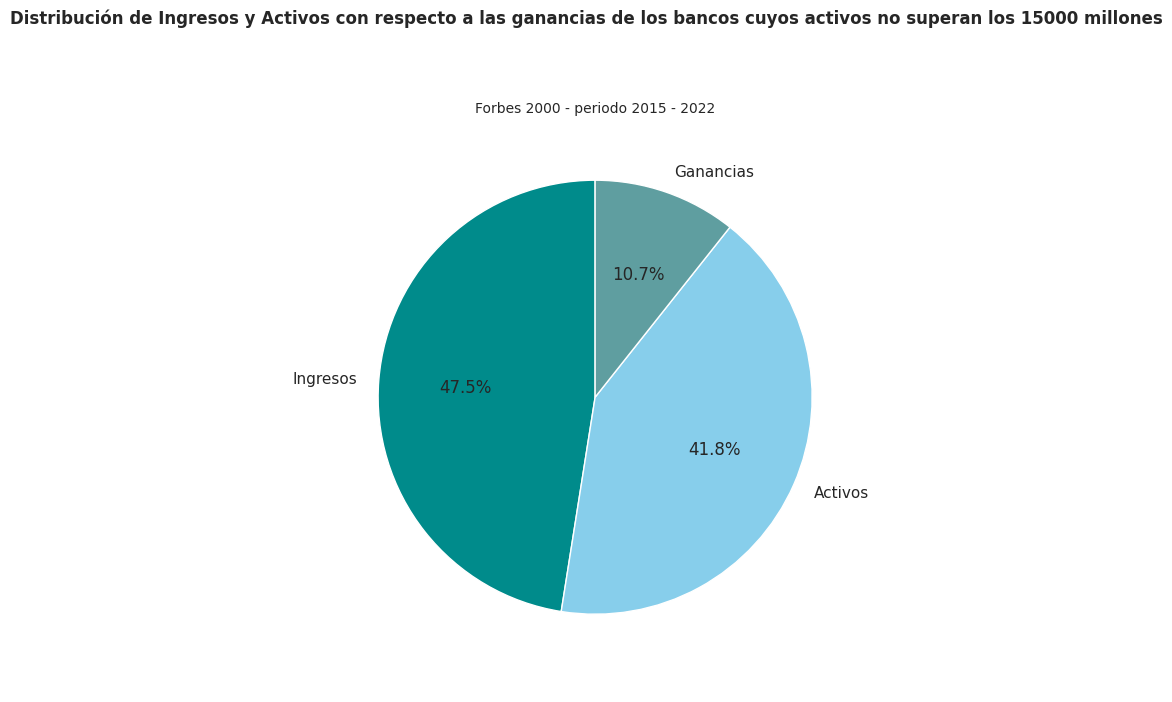

In [118]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(7, 8))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

colors = ['darkcyan', 'skyblue', 'cadetblue']

#Generar la grafica de barras y eliminar la info del eje X
ax.pie(data.Mdlls, labels = data.concepto , colors = colors,  autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
#ax.set_xticklabels([])


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Distribución de Ingresos y Activos con respecto a las ganancias de los bancos cuyos activos no superan los 15000 millones", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

plt.show()


8. ¿Cuáles fueron las ganancias anuales de las principales empresas en la Industria automotriz?

In [ ]:
#@title
EmG_Auto = forbes_2022_2[(forbes_2022_2['Industria'] == 'Consumer Durables') &
                         (forbes_2022_2['Empresa'].isin(['Toyota Motor', 'Volkswagen Group', "BMW Group", 'General Motors',
                                                         'Honda Motor', 'SAIC Motor', 'Porsche Automobil Holding', 'Mercedes-Benz Group',
                                                         'Ford Motor', 'Nissan Motor', 'Dongfeng Motor Group', 'Fiat Chrysler Automobiles',
                                                         'Continental','Continental', 'Volvo Group', 'Suzuki Motor', 'Peugeot', 'Renault',
                                                         'Subaru', 'Isuzu Motors', 'Yamaha Motor', 'Fiat Chrysler Automobiles ', 'Mazda Motor',
                                                         'Mitsubishi Motors', 'Tesla', 'Tesla Motors' ]))]

#EmG_Auto = EmG_Auto .groupby(["Año","Empresa", "Industria", "Pais"])["Ganancias"].sum().sort_values(ascending=False)
EmG_Auto = EmG_Auto .groupby(["Año"])["Ganancias"].sum()

EmG_Auto = EmG_Auto.reset_index()

EmG_Auto.round(0)

,Año,Ganancias
0,2015,79532.0
1,2016,80671.0
2,2017,75830.0
3,2018,100030.0
4,2019,97905.0
5,2020,72173.0
6,2021,27026.0
7,2022,146379.0


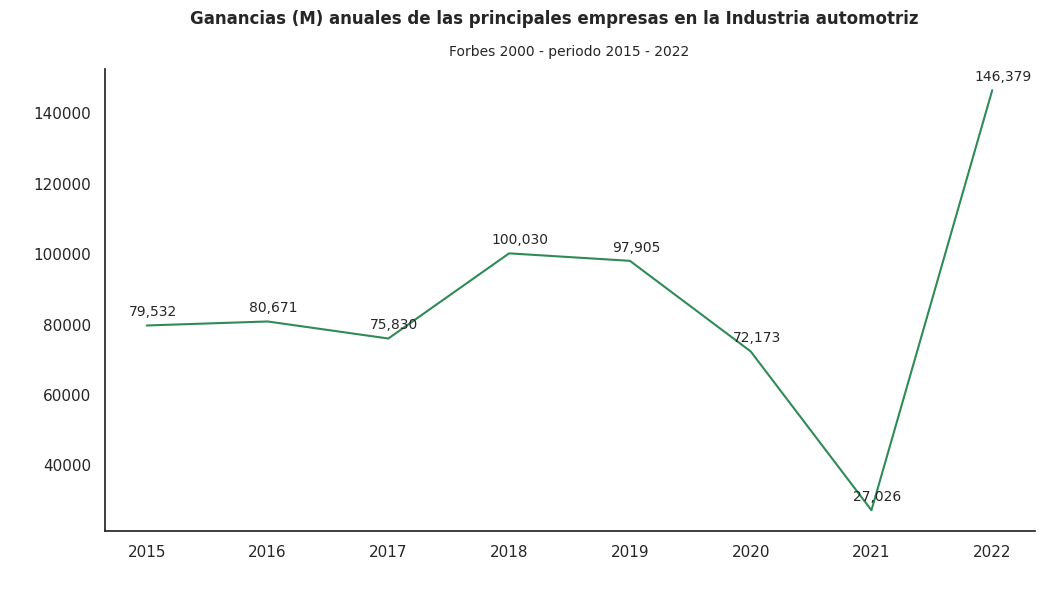

In [ ]:
#@title
#Determinar el formato de la grafica
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(context="notebook", style = "white")
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

#Generar la grafica de barras y eliminar la info del eje X
ax = sns.lineplot(EmG_Auto,x= "Año", y ="Ganancias" , color = "seagreen" )
#ax.set_xticklabels([])


# Añadiendo un título y subtítulo al gráfico y ocultando los labels de cada eje
plt.suptitle("Ganancias (M) anuales de las principales empresas en la Industria automotriz", size = 12, weight = "bold")
plt.title("Forbes 2000 - periodo 2015 - 2022", fontsize = 10, pad =10)
plt.xlabel(" ")
plt.ylabel(" ")

# Escribiendo los valores de cada (eje X) en el gráfico
for index, punto in enumerate(ax.lines[0].get_xydata()):
  pos_x = punto[0]
  pos_y = punto[1]
  offset_x = -.15
  offset_y = 4000
  cantidad = f'{pos_y:,.0f}'.replace(',',',')
  ax.text(x = pos_x + offset_x , y = pos_y + offset_y , s = cantidad, va='center', fontsize=10)

plt.show()

#Extra